# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q8"> 8. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q9"> 9. How does violent crime appear on the map?
><li><a href="#q10"> 10. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [8]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import warnings

plt.style.use("fivethirtyeight")
# plt.style.use("seaborn-white")
# plt.style.use("classic")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
# df = pd.read_csv("crime_reports.csv")
df = pd.read_csv("df_clean.csv")

df.occurred_date = df.occurred_date.astype("datetime64")
df.set_index(["occurred_date"], inplace=True)
df.sort_index(inplace=True)

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2302181 entries, 2003-01-01 to 2021-01-16
Data columns (total 17 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   highest_offense_description  object 
 1   family_violence              object 
 2   report_date_time             object 
 3   location_type                object 
 4   address                      object 
 5   zip_code                     float64
 6   council_district             float64
 7   apd_sector                   object 
 8   apd_district                 object 
 9   clearance_status             object 
 10  clearance_date               object 
 11  latitude                     float64
 12  longitude                    float64
 13  year                         int64  
 14  month                        int64  
 15  week                         int64  
 16  day                          int64  
dtypes: float64(4), int64(4), object(9)
memory usage: 316.2+ MB


None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21067
address                            12
zip_code                        14171
council_district                47126
apd_sector                       9000
apd_district                     9475
clearance_status               606087
clearance_date                 336882
latitude                        38897
longitude                       38897
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,FORGERY AND PASSING,N,2003-09-13 09:35:00,COMMERCIAL / OFFICE BUILDING,8501 BURNET RD,78757.0,7.0,ID,7,NaN,2003-09-15 00:00:00,30.366117,-97.727721,2003,1,1,1
2003-01-01,BURGLARY OF VEHICLE,N,2003-01-02 09:30:00,PARKING LOTS / GARAGE,1070 MEARNS MEADOW BLVD,78758.0,4.0,ED,1,N,NaN,30.369487,-97.699600,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2006-05-02 07:48:00,RESIDENCE / HOME,5711 BOULDER CREEK,78724.0,1.0,CH,7,NaN,2006-06-13 00:00:00,30.306071,-97.654709,2003,1,1,1
2003-01-01,SERIOUS INJURY TO A CHILD,Y,2003-01-22 08:59:00,RESIDENCE / HOME,1800 BLOCK E STASSNEY LN,78744.0,2.0,FR,5,NaN,2003-07-30 00:00:00,NaN,NaN,2003,1,1,1
2003-01-01,HARASSMENT,N,2003-03-03 16:05:00,RESIDENCE / HOME,6501 FELIX AVE,78741.0,3.0,HE,5,N,2003-03-05 00:00:00,30.233993,-97.694812,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-01-16,ATT AUTO THEFT,N,2021-01-16 18:37:00,RESIDENCE / HOME,11215 RESEARCH BLVD SVRD NB,78759.0,6.0,AD,2,NaN,NaN,30.409253,-97.743182,2021,1,2,16
2021-01-16,VIOL OF PROTECTIVE ORDER,N,2021-01-16 13:12:00,RESIDENCE / HOME,7900 CREEKMERE LN,78748.0,2.0,FR,3,NaN,NaN,30.181922,-97.788609,2021,1,2,16
2021-01-16,CRIMINAL TRESPASS,N,2021-01-16 15:23:00,OTHER / UNKNOWN,2001 PEACH TREE ST,78704.0,5.0,DA,1,NaN,NaN,30.254357,-97.772511,2021,1,2,16
2021-01-16,THEFT,N,2021-01-16 20:37:00,RESIDENCE / HOME,10127 MIDDLE FISKVILLE RD,78753.0,4.0,ED,7,NaN,NaN,30.364259,-97.681626,2021,1,2,16
2021-01-16,CRIMINAL MISCHIEF,N,2021-01-16 03:15:00,STREETS / HWY / ROAD / ALLEY,RIVER ST / EAST AVE,78701.0,9.0,CH,1,NaN,NaN,30.257582,-97.738133,2021,1,2,16


In [4]:
df.duplicated().sum()

828

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

## III. Exploratory Analysis

<a id='q1'></a>
### A. Question 1. What areas of Austin have the highest crime rates? 

78741.0    206710
78753.0    178874
78701.0    168357
78758.0    159285
78704.0    154607
78745.0    150778
78702.0    136748
78744.0    126298
78723.0    118409
78752.0     84452
78748.0     68115
78759.0     66334
78751.0     64057
78757.0     57920
78705.0     57090
78721.0     47712
78749.0     40429
78724.0     37666
78727.0     35874
78703.0     35184
78731.0     28669
78746.0     28117
78729.0     25286
78750.0     23734
78754.0     22834
Name: zip_code, dtype: int64

78741.0    0.090377
78753.0    0.078207
78701.0    0.073609
78758.0    0.069642
78704.0    0.067597
78745.0    0.065923
78702.0    0.059789
78744.0    0.055220
78723.0    0.051771
78752.0    0.036924
78748.0    0.029781
78759.0    0.029002
78751.0    0.028007
78757.0    0.025324
78705.0    0.024961
78721.0    0.020861
78749.0    0.017676
78724.0    0.016468
78727.0    0.015685
78703.0    0.015383
78731.0    0.012535
78746.0    0.012293
78729.0    0.011056
78750.0    0.010377
78754.0    0.009983
Name: zip_code, dtype: float64

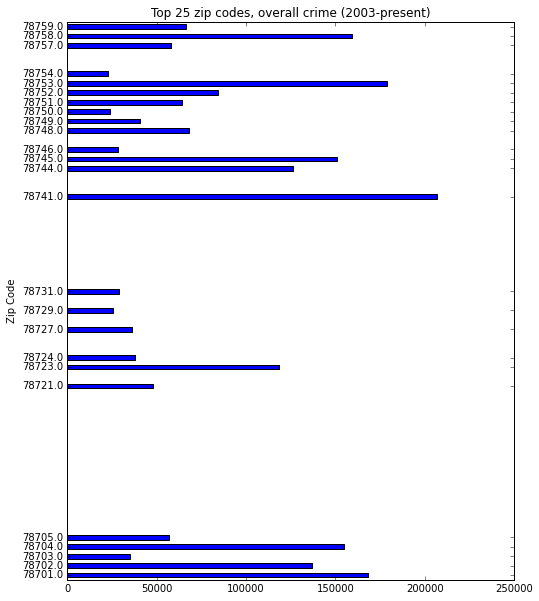

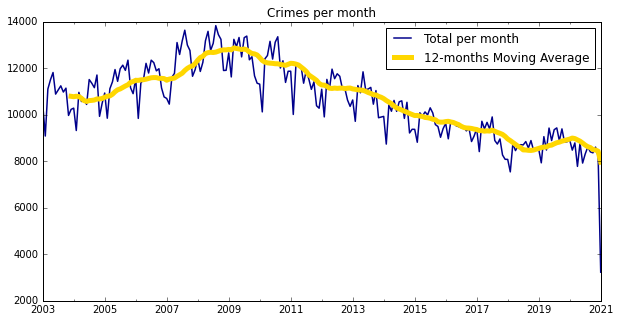

In [7]:
# Create and show dataframe for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 areas for crime
df.zip_code.value_counts().head(25).plot.barh(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 10),
    xlabel="Zip Code",
    ylabel="Total Crimes",
)
plt.show()

# Using resample 'M' and rolling window 12
plt.figure(figsize=(10, 5))
df.resample("M").size().plot(color="darkblue", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="gold", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231005
THEFT                             211508
FAMILY DISTURBANCE                179176
CRIMINAL MISCHIEF                 127383
ASSAULT W/INJURY-FAM/DATE VIOL     77995
BURGLARY OF RESIDENCE              77062
DWI                                69550
PUBLIC INTOXICATION                68736
HARASSMENT                         64176
DISTURBANCE - OTHER                61555
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,DWI,THEFT,CRIMINAL MISCHIEF,FAMILY DISTURBANCE,PUBLIC INTOXICATION,ASSAULT W/INJURY-FAM/DATE VIOL,BURGLARY OF RESIDENCE,TOTAL
occurred_date,,,,,,,,,
2020-09-30,928,147,607,504,794,51,252,146,3429
2020-10-31,420,196,614,551,881,74,253,162,3151
2020-11-30,482,183,636,506,864,71,282,161,3185
2020-12-31,425,165,592,474,825,50,254,184,2969
2021-01-31,193,75,222,199,300,27,108,68,1192


<Figure size 432x288 with 0 Axes>

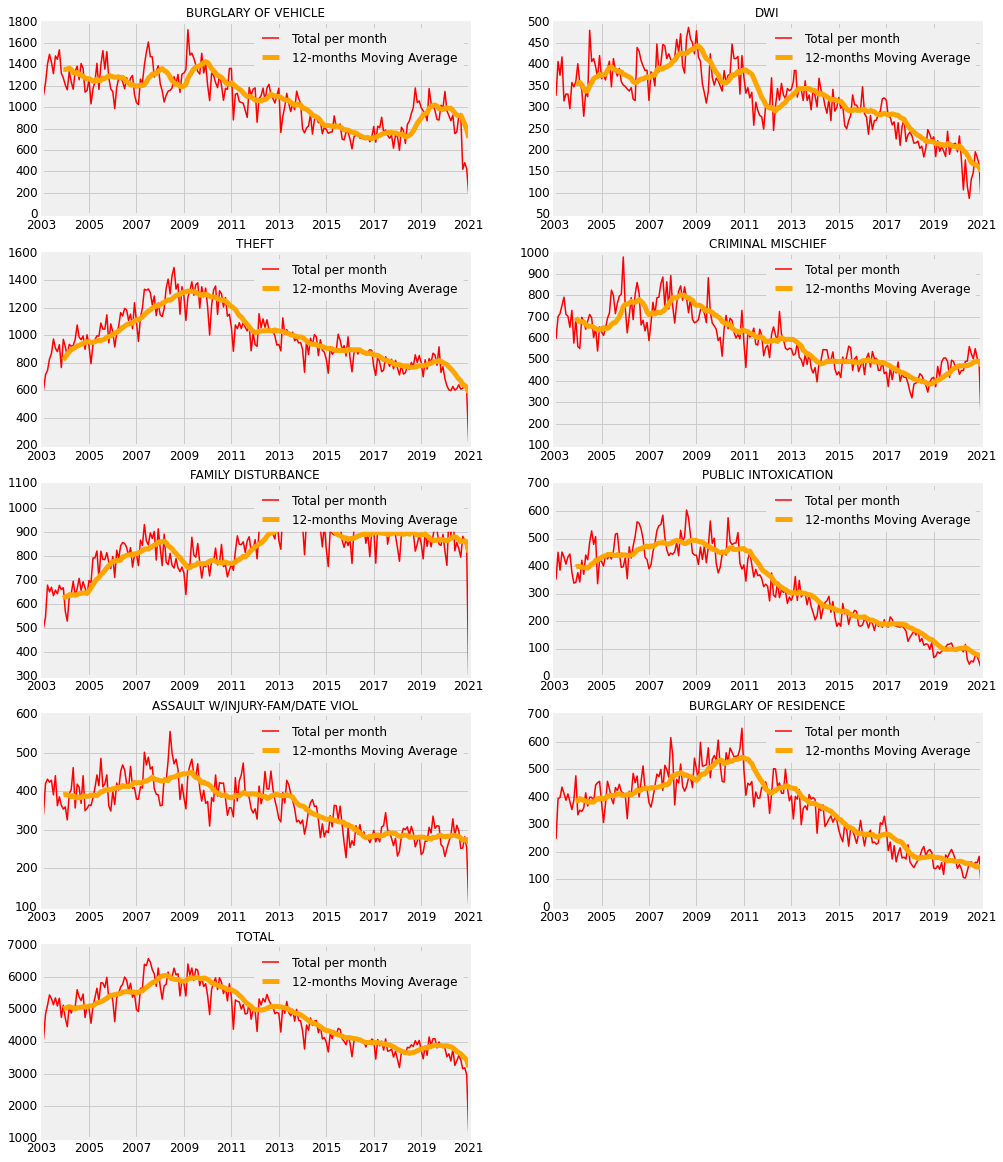

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "THEFT", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17147
THEFT                             15760
BURGLARY OF VEHICLE                9259
WARRANT ARREST NON TRAFFIC         8966
DWI                                8310
ASSAULT WITH INJURY                7515
VIOL CITY ORDINANCE - OTHER        6187
POSS OF DRUG PARAPHERNALIA         6033
CRIMINAL MISCHIEF                  5808
CRIMINAL TRESPASS                  3908
POSSESSION OF MARIJUANA            3381
DISTURBANCE - OTHER                3348
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2893
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
CRIMINAL TRESPASS/TRANSIENT        2582
ASSAULT BY CONTACT                 2581
THEFT OF BICYCLE                   2507
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2150
DOC FIGHTING                       2108
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1727
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101849
THEFT                             0.093611
BURGLARY OF VEHICLE               0.054996
WARRANT ARREST NON TRAFFIC        0.053256
DWI                               0.049359
ASSAULT WITH INJURY               0.044637
VIOL CITY ORDINANCE - OTHER       0.036749
POSS OF DRUG PARAPHERNALIA        0.035835
CRIMINAL MISCHIEF                 0.034498
CRIMINAL TRESPASS                 0.023213
POSSESSION OF MARIJUANA           0.020082
DISTURBANCE - OTHER               0.019886
CUSTODY ARREST TRAFFIC WARR       0.017778
POSS CONTROLLED SUB/NARCOTIC      0.017184
CAMPING IN PARK                   0.016542
VOCO - ALCOHOL  CONSUMPTION       0.015978
CRIMINAL TRESPASS/TRANSIENT       0.015336
ASSAULT BY CONTACT                0.015331
THEFT OF BICYCLE                  0.014891
URINATING IN PUBLIC PLACE         0.013875
FAMILY DISTURBANCE                0.012770
DOC FIGHTING                      0.012521
PROTECTIVE ORDER                  0.012468
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

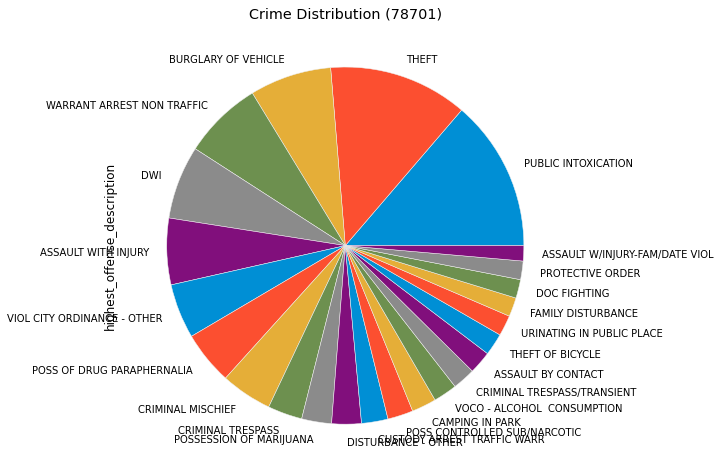

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### C. Question 2. How is crime distributed in 78753? 

THEFT                             17119
BURGLARY OF VEHICLE               15928
FAMILY DISTURBANCE                14644
CRIMINAL MISCHIEF                  9461
THEFT BY SHOPLIFTING               7624
ASSAULT W/INJURY-FAM/DATE VIOL     7142
BURGLARY OF RESIDENCE              6065
DWI                                5001
DISTURBANCE - OTHER                4752
CUSTODY ARREST TRAFFIC WARR        4348
HARASSMENT                         4246
AUTO THEFT                         4215
POSS OF DRUG PARAPHERNALIA         3724
PUBLIC INTOXICATION                3367
ASSAULT WITH INJURY                3300
CRIMINAL TRESPASS                  3136
POSS CONTROLLED SUB/NARCOTIC       2968
RUNAWAY CHILD                      2930
WARRANT ARREST NON TRAFFIC         2795
POSSESSION OF MARIJUANA            2705
BURGLARY NON RESIDENCE             2487
VIOL CITY ORDINANCE - OTHER        1865
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

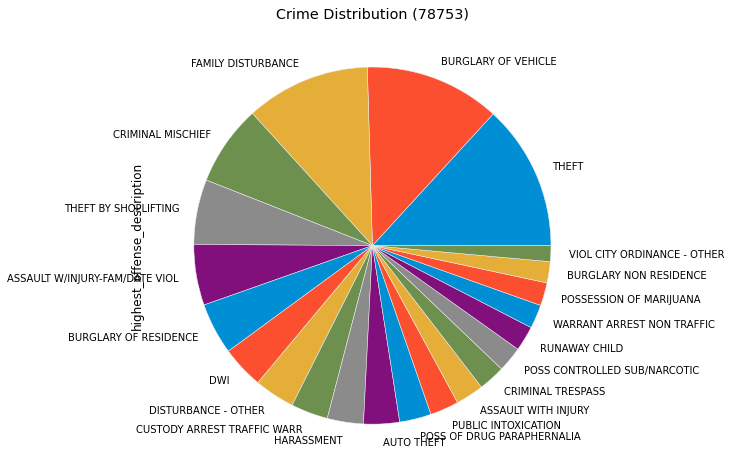

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### D. Question 4. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20325
BURGLARY OF VEHICLE               19795
THEFT                             15584
CRIMINAL MISCHIEF                 11035
ASSAULT W/INJURY-FAM/DATE VIOL     9619
BURGLARY OF RESIDENCE              8874
PUBLIC INTOXICATION                6379
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5653
HARASSMENT                         5512
DISTURBANCE - OTHER                5161
AUTO THEFT                         4619
ASSAULT WITH INJURY                4530
CRIMINAL TRESPASS                  3912
POSS CONTROLLED SUB/NARCOTIC       3857
POSSESSION OF MARIJUANA            3792
THEFT BY SHOPLIFTING               3573
POSS OF DRUG PARAPHERNALIA         3536
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2789
VIOL CITY ORDINANCE - OTHER        2195
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098326
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

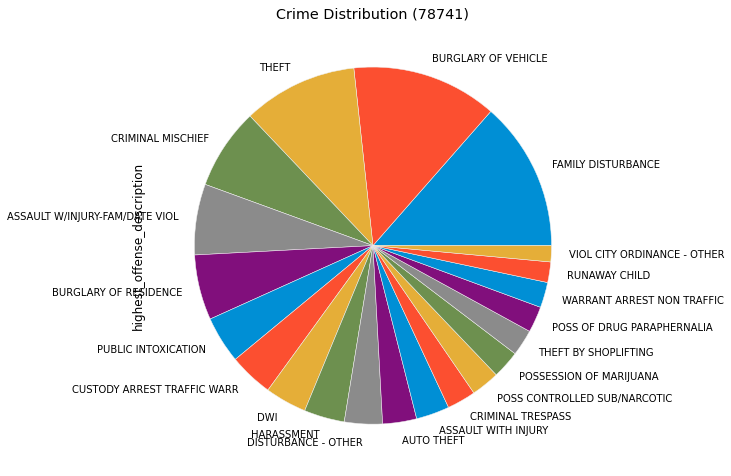

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### E. Question 5. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                14921
BURGLARY OF VEHICLE               14745
THEFT                             13551
CRIMINAL MISCHIEF                  8503
BURGLARY OF RESIDENCE              5867
ASSAULT W/INJURY-FAM/DATE VIOL     5750
HARASSMENT                         5137
DISTURBANCE - OTHER                4511
DWI                                4415
PUBLIC INTOXICATION                3996
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2877
AUTO THEFT                         2845
ASSAULT WITH INJURY                2664
RUNAWAY CHILD                      2596
POSSESSION OF MARIJUANA            2586
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2016
THEFT BY SHOPLIFTING               1981
CRIMINAL TRESPASS                  1954
IDENTITY THEFT                     1578
POSS OF DRUG PARAPHERNALIA         1518
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

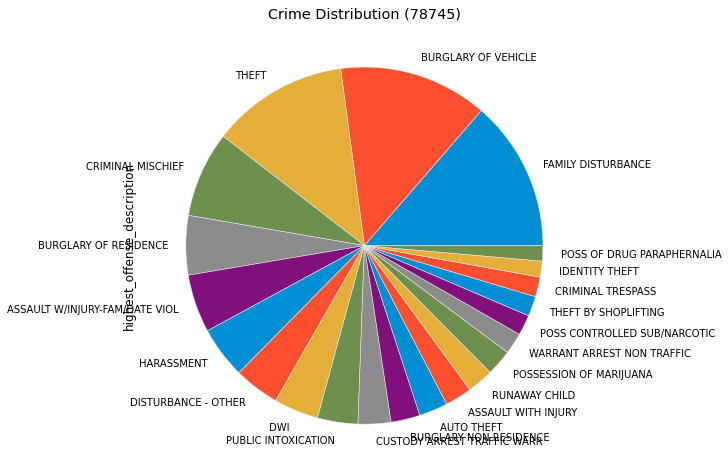

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### F. Question 6. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8619
THEFT                             5599
CRIMINAL MISCHIEF                 4965
THEFT OF BICYCLE                  3472
PUBLIC INTOXICATION               2627
BURGLARY OF RESIDENCE             2118
WARRANT ARREST NON TRAFFIC        1549
CRIMINAL TRESPASS                 1346
AUTO THEFT                        1305
ASSAULT WITH INJURY               1245
DWI                               1219
HARASSMENT                        1213
FAMILY DISTURBANCE                1186
DISTURBANCE - OTHER               1115
BURGLARY NON RESIDENCE             876
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
CUSTODY ARREST TRAFFIC WARR        782
GRAFFITI                           777
ASSAULT W/INJURY-FAM/DATE VIOL     690
POSSESSION OF MARIJUANA            657
ASSAULT BY CONTACT                 616
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150972
THEFT                             0.098073
CRIMINAL MISCHIEF                 0.086968
THEFT OF BICYCLE                  0.060816
PUBLIC INTOXICATION               0.046015
BURGLARY OF RESIDENCE             0.037099
WARRANT ARREST NON TRAFFIC        0.027133
CRIMINAL TRESPASS                 0.023577
AUTO THEFT                        0.022859
ASSAULT WITH INJURY               0.021808
DWI                               0.021352
HARASSMENT                        0.021247
FAMILY DISTURBANCE                0.020774
DISTURBANCE - OTHER               0.019531
BURGLARY NON RESIDENCE            0.015344
CRIMINAL TRESPASS/TRANSIENT       0.015204
VIOL CITY ORDINANCE - OTHER       0.013855
CUSTODY ARREST TRAFFIC WARR       0.013698
GRAFFITI                          0.013610
ASSAULT W/INJURY-FAM/DATE VIOL    0.012086
POSSESSION OF MARIJUANA           0.011508
ASSAULT BY CONTACT                0.010790
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

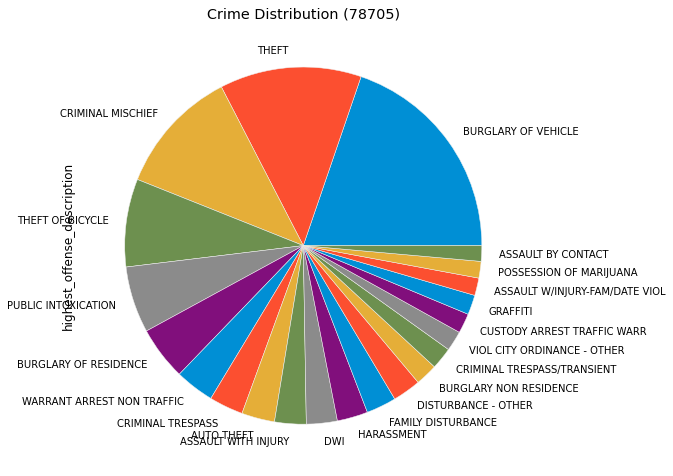

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. Question 7. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [15]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130910
78753.0    0.098705
78758.0    0.094114
78701.0    0.074517
78723.0    0.074414
78702.0    0.074311
78745.0    0.057763
78752.0    0.052350
78744.0    0.052076
78704.0    0.048547
Name: zip_code, dtype: float64

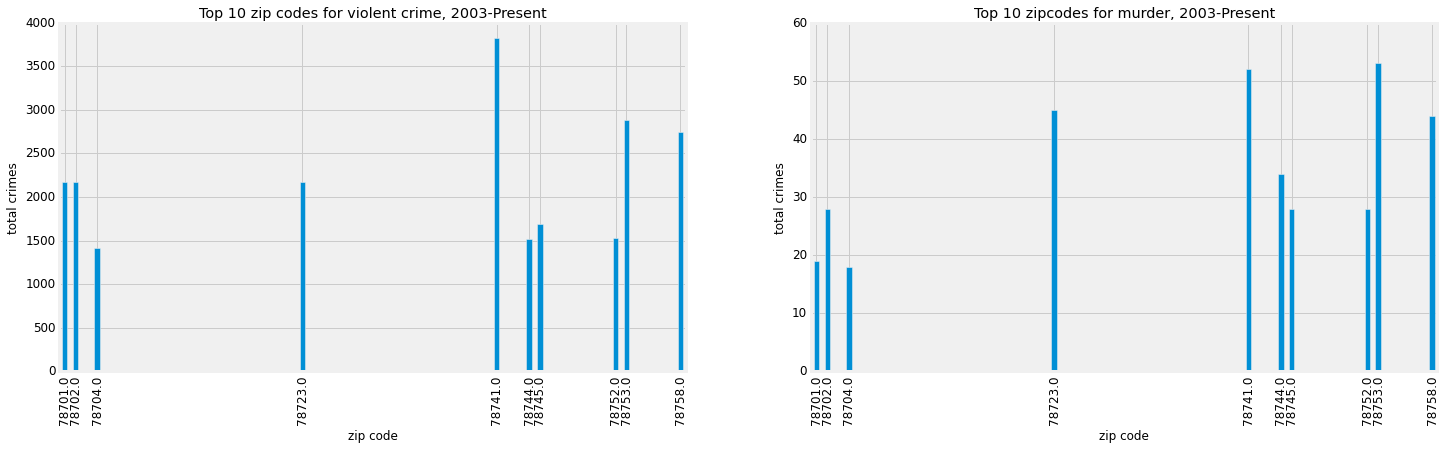

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

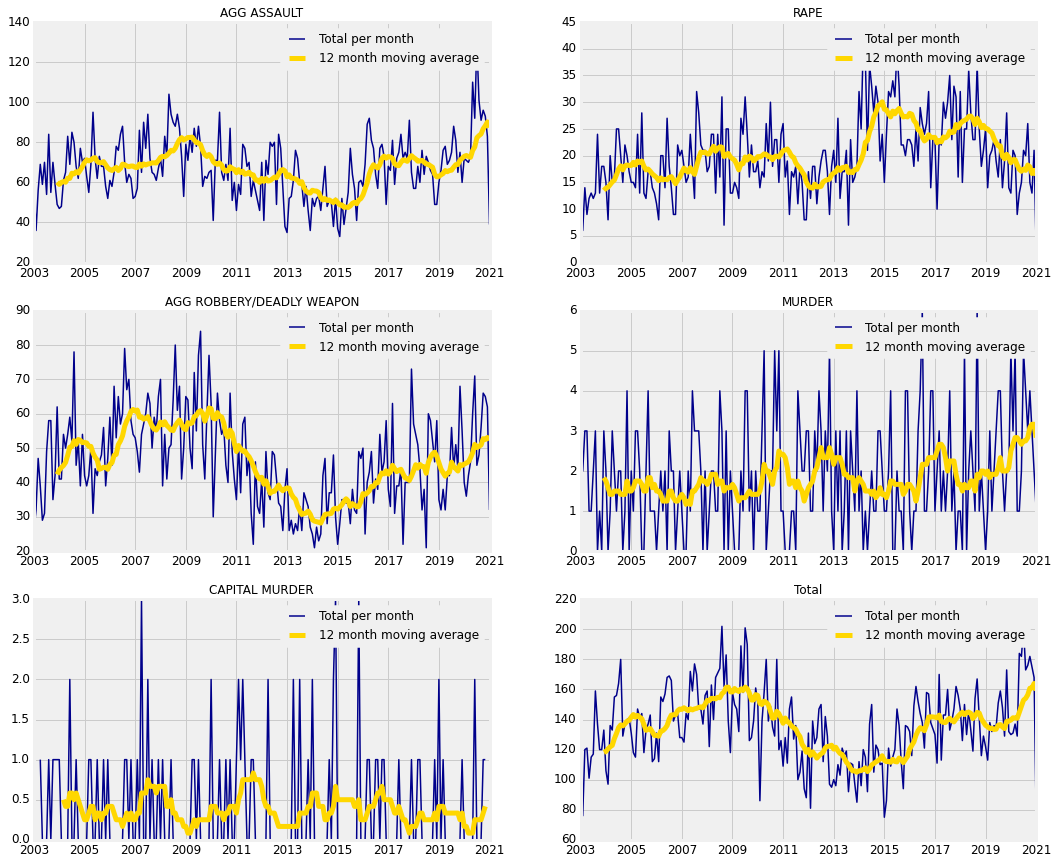

In [27]:
display(df_viol.zip_code.value_counts(normalize=True).head(10))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(10).plot.bar(
    title="Top 10 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(10).plot.bar(
    title="Top 10 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="darkblue", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="gold", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

#### Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

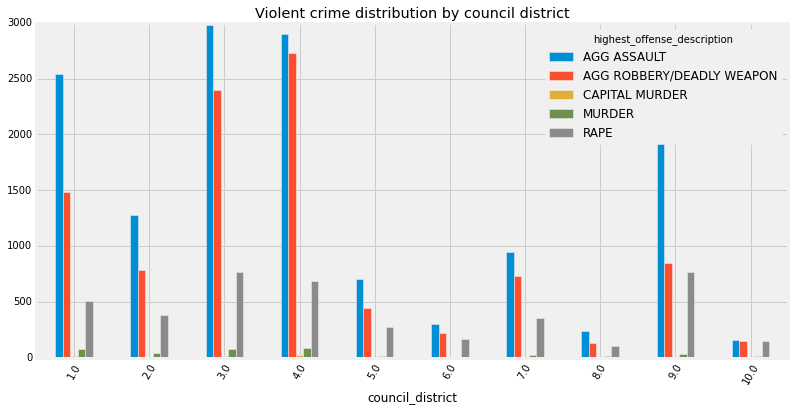

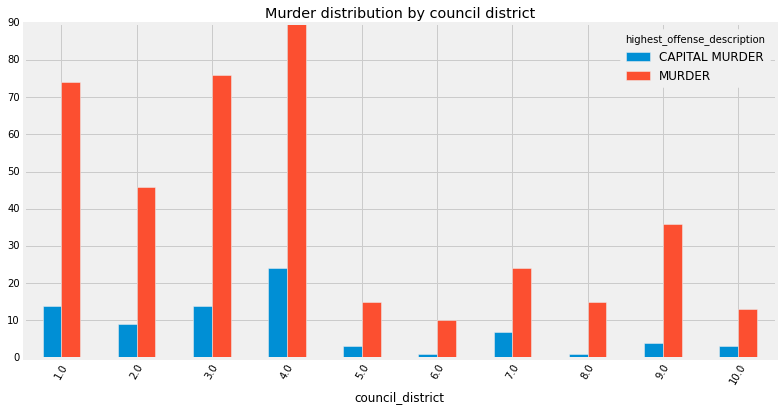

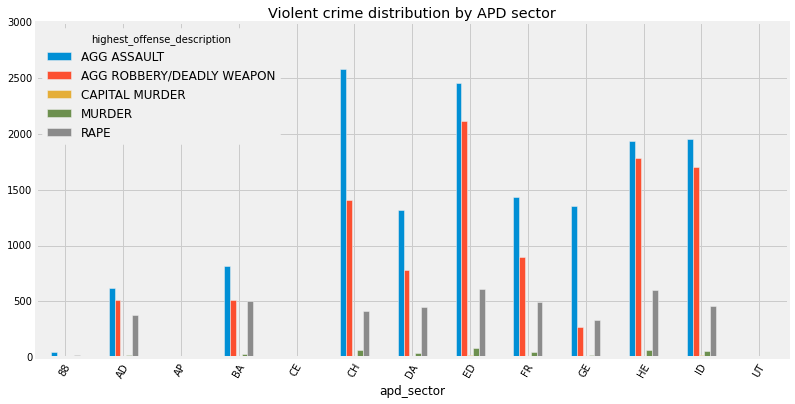

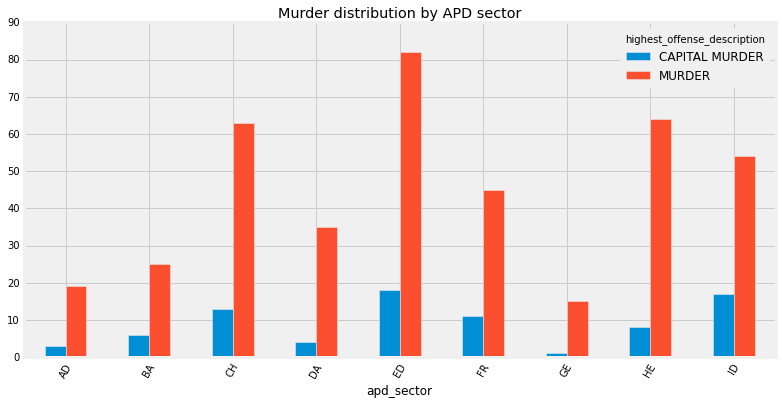

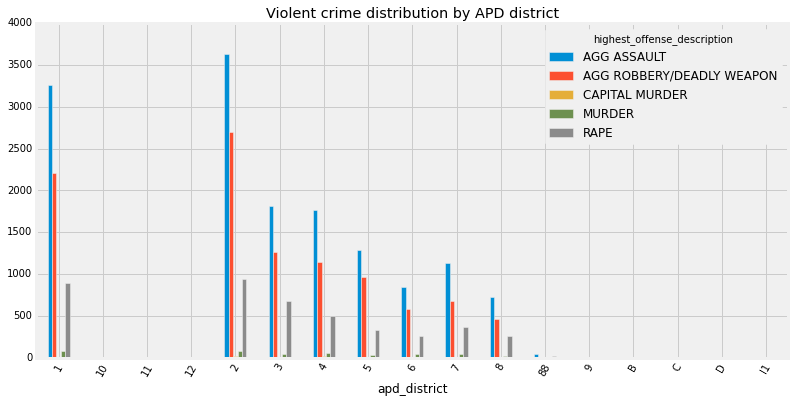

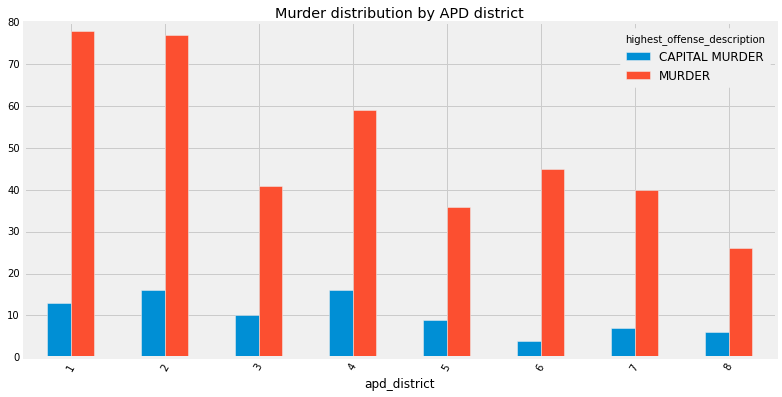

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

#### Violent crime and murder distribution by location type

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                            13   
AMUSEMENT PARK                                            0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                  2   
ATM SEPARATE FROM BANK                                    1   
AUTO DEALERSHIP NEW / USED                               10   
BANKS / SAVINGS & LOAN                                    5   
BAR / NIGHT CLUB                                        655   
CAMP / CAMPGROUND                                        21   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                     20   
COMMERCIAL / OFFICE BUILDING                            269   
COMMUNITY CENTER                                          9   
CONSTRUCTION SITE                                        30   
CONVENIENCE STORE                                       226   
DAYCARE FACILITY                                       

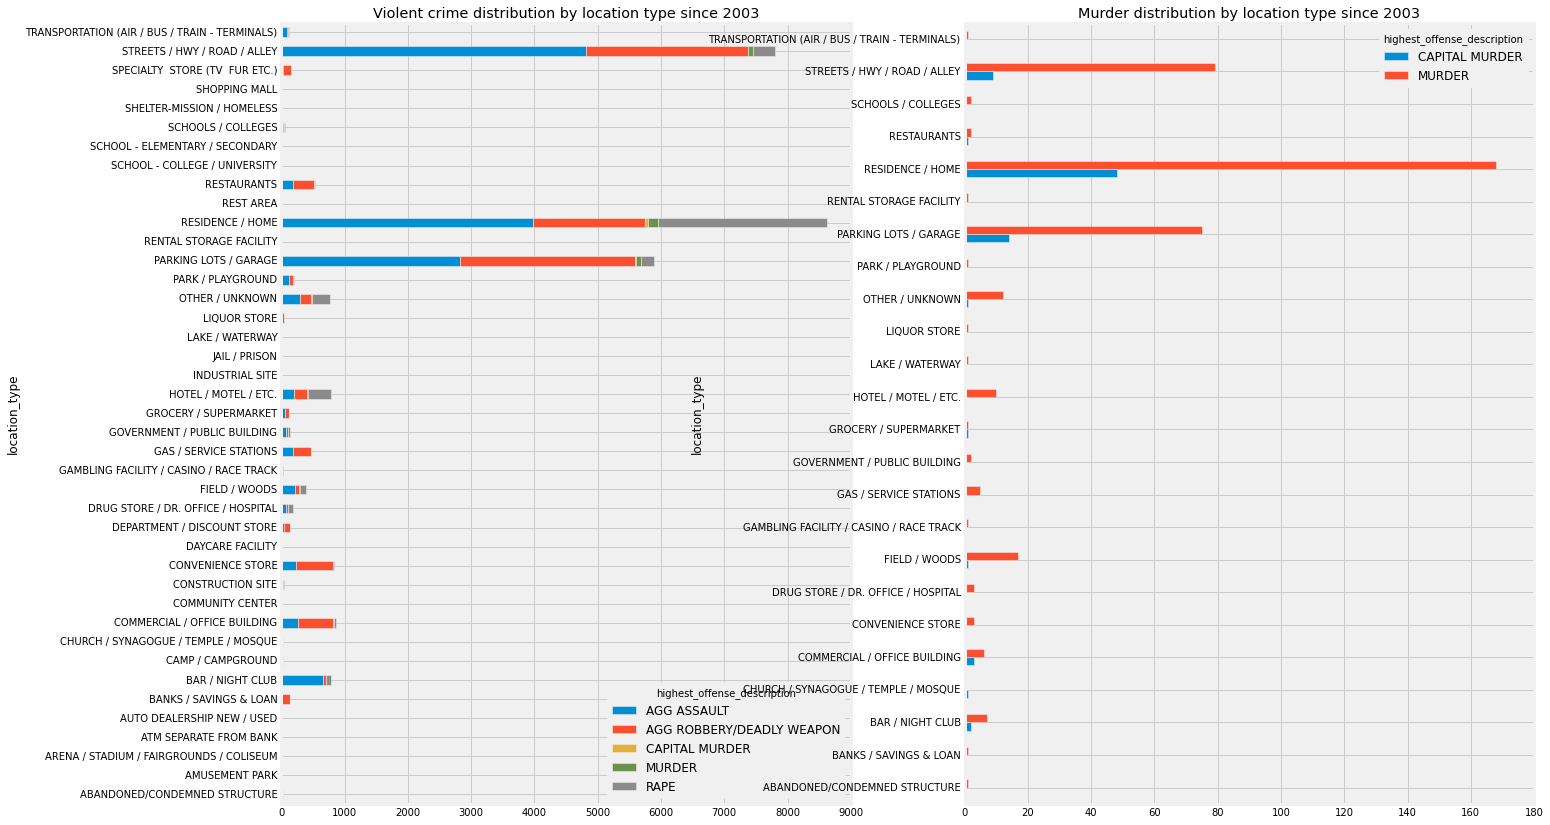

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
print(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### I. Question 9. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### J. Question 10. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
00 BLOCK UNKNOWN            59
6409 SPRINGDALE RD          59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         54
1071 CLAYTON LN             53
9200 NORTH PLZ              53
1030 NORWOOD PARK BLVD      53
1137 GUNTER ST              51
2237 E RIVERSIDE DR         51
1124 RUTLAND DR             50
Name: address, dtype: int64

In [24]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

6407 SPRINGDALE RD           3
4700 E RIVERSIDE DR          3
8800 N IH 35 SVRD SB         3
8610 N LAMAR BLVD            3
6409 SPRINGDALE RD           3
10610 MORADO CIR             2
8225 SAM RAYBURN DR          2
815 W SLAUGHTER LN           2
2508 E RIVERSIDE DR          2
7000 DECKER LN               2
2400 WICKERSHAM LN           2
1050 SPRINGDALE RD           2
1137 GUNTER ST               2
2501 ANKEN DR                2
10503 N LAMAR BLVD           2
601 E 15TH ST                2
9601 MIDDLE FISKVILLE RD     2
2915 S IH 35 SVRD NB         2
833 FAIRFIELD DR             2
605 MASTERSON PASS           2
1711 RUTLAND DR              2
8912 N LAMAR BLVD            2
6118 FAIRWAY ST              2
744 W WILLIAM CANNON DR      2
9010 GALEWOOD DR             2
9220 N IH 35 SVRD SB         2
2713 S CONGRESS AVE          2
201 W 5TH ST                 2
6600 ED BLUESTEIN BLVD SB    2
9200 NORTH PLZ               2
Name: address, dtype: int64

In [25]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")